# Chain

## Messages

In [1]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.", name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()


================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


## Chat Models

In [2]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [4]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [5]:
result

AIMessage(content="One of the best places to see orcas in the U.S. is the Pacific Northwest, particularly around the San Juan Islands in Washington State. The waters surrounding these islands are a popular habitat for orcas, especially the Southern Resident killer whale population, which is known to frequent the area during the summer months.\n\nAnother excellent location is the waters near Victoria, British Columbia, which is just a short trip from the U.S. border. Additionally, you can also find orcas in places like the Kenai Fjords National Park in Alaska, where they can be seen feeding in the rich waters.\n\nIf you're planning to go, consider taking a whale-watching tour, as they are often led by experienced guides who know the best spots to find these magnificent animals. Just remember to respect the wildlife and follow guidelines to ensure their safety and well-being!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 169, 'prompt_token

In [6]:
result.response_metadata

{'token_usage': {'completion_tokens': 169,
  'prompt_tokens': 67,
  'total_tokens': 236,
  'completion_tokens_details': {'reasoning_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_483d39d857',
 'finish_reason': 'stop',
 'logprobs': None}

## Tools 

In [7]:
def multiply(a: int, b: int) -> int:
    return a * b

llm_with_tools = llm.bind_tools([multiply])

In [15]:
tool_call = llm_with_tools.invoke([HumanMessage(content="What is 2 multiplied by 3", name="Alex")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jvp2uEbuwZGr4fxgya1b5wXa', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 50, 'total_tokens': 67, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_483d39d857', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-eedd0dcc-77cf-4bea-923a-11711fb816ca-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_jvp2uEbuwZGr4fxgya1b5wXa', 'type': 'tool_call'}], usage_metadata={'input_tokens': 50, 'output_tokens': 17, 'total_tokens': 67})

In [16]:
tool_call.additional_kwargs

{'tool_calls': [{'id': 'call_jvp2uEbuwZGr4fxgya1b5wXa',
   'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'},
   'type': 'function'}],
 'refusal': None}

In [17]:
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jvp2uEbuwZGr4fxgya1b5wXa', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 50, 'total_tokens': 67, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_483d39d857', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-eedd0dcc-77cf-4bea-923a-11711fb816ca-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_jvp2uEbuwZGr4fxgya1b5wXa', 'type': 'tool_call'}], usage_metadata={'input_tokens': 50, 'output_tokens': 17, 'total_tokens': 67})

## Using messages as state

In [18]:
from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

# by default, each node overrides the current state, so we have to use
# a "reducer" to enforce the appending of new messages
# which is done by add_messages
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# we can use the builtin implementation which is the same as above:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

In [20]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Alex")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='e854f87d-92a8-4d26-9896-784110d3e6ad'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Alex', id='576c2756-08be-493b-8bd5-7fc2a067f5b0'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='9818c3e1-8364-41ec-b001-296a8f328974')]

## Our Graph

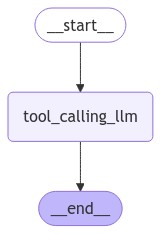

In [21]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


# build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
messages = graph.invoke({"messages": HumanMessage(content="Hello")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hello
================================== Ai Message ==================================

Hello! How can I assist you today?


In [24]:
messages = graph.invoke({"messages": HumanMessage(content="multiply 2 and 3")})
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_OEaT1I22EXcjVrcjNG1UTY4l)
 Call ID: call_OEaT1I22EXcjVrcjNG1UTY4l
  Args:
    a: 2
    b: 3
